In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/多変量解析/auto-mpg.csv')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 24.6+ KB


In [6]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


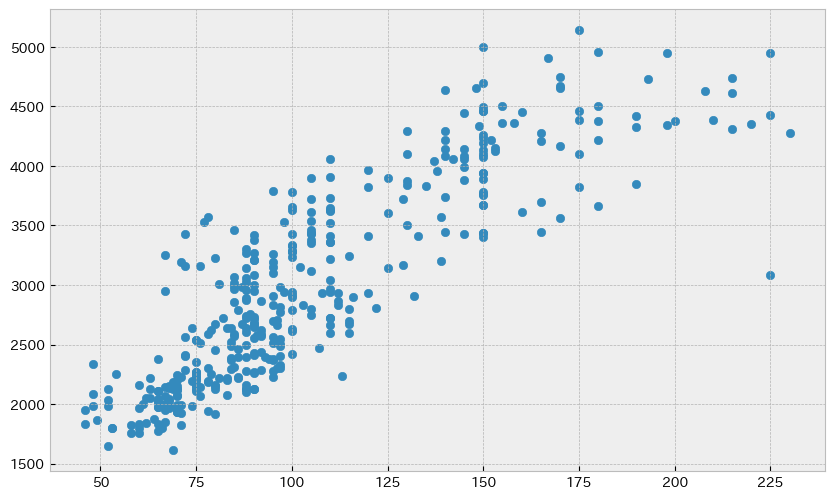

In [7]:
# 散布図
plt.scatter(df['Horsepower'], df['Weight']);

In [8]:
# 相関係数
df[['Horsepower', 'Weight']].corr()

,Horsepower,Weight
Horsepower,1.000000,0.864538
Weight,0.864538,1.000000


In [9]:
# 外れ値削除
_df = df[['Horsepower', 'Weight']].drop(df.index[(df['Horsepower']==225.0) & (df['Weight']==3086.0)])
len(_df)

391

In [10]:
len(df)

392

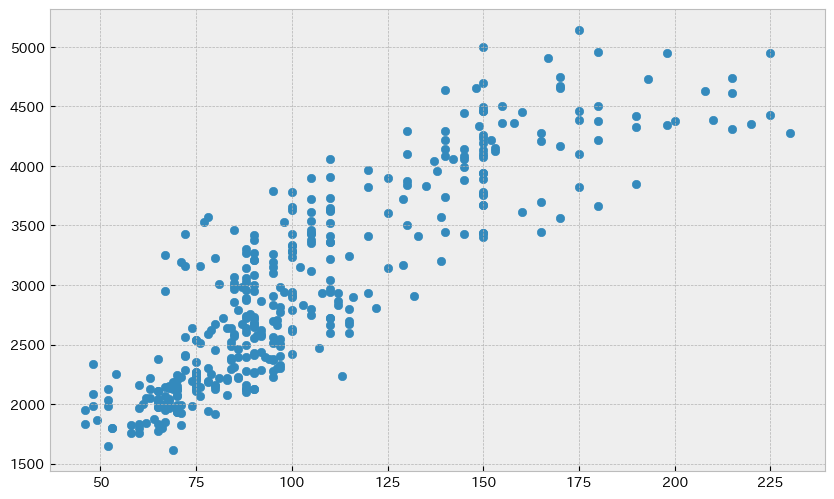

In [11]:
plt.scatter(_df['Horsepower'], _df['Weight']);

In [12]:
_df.corr()

,Horsepower,Weight
Horsepower,1.000000,0.874596
Weight,0.874596,1.000000


In [13]:
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


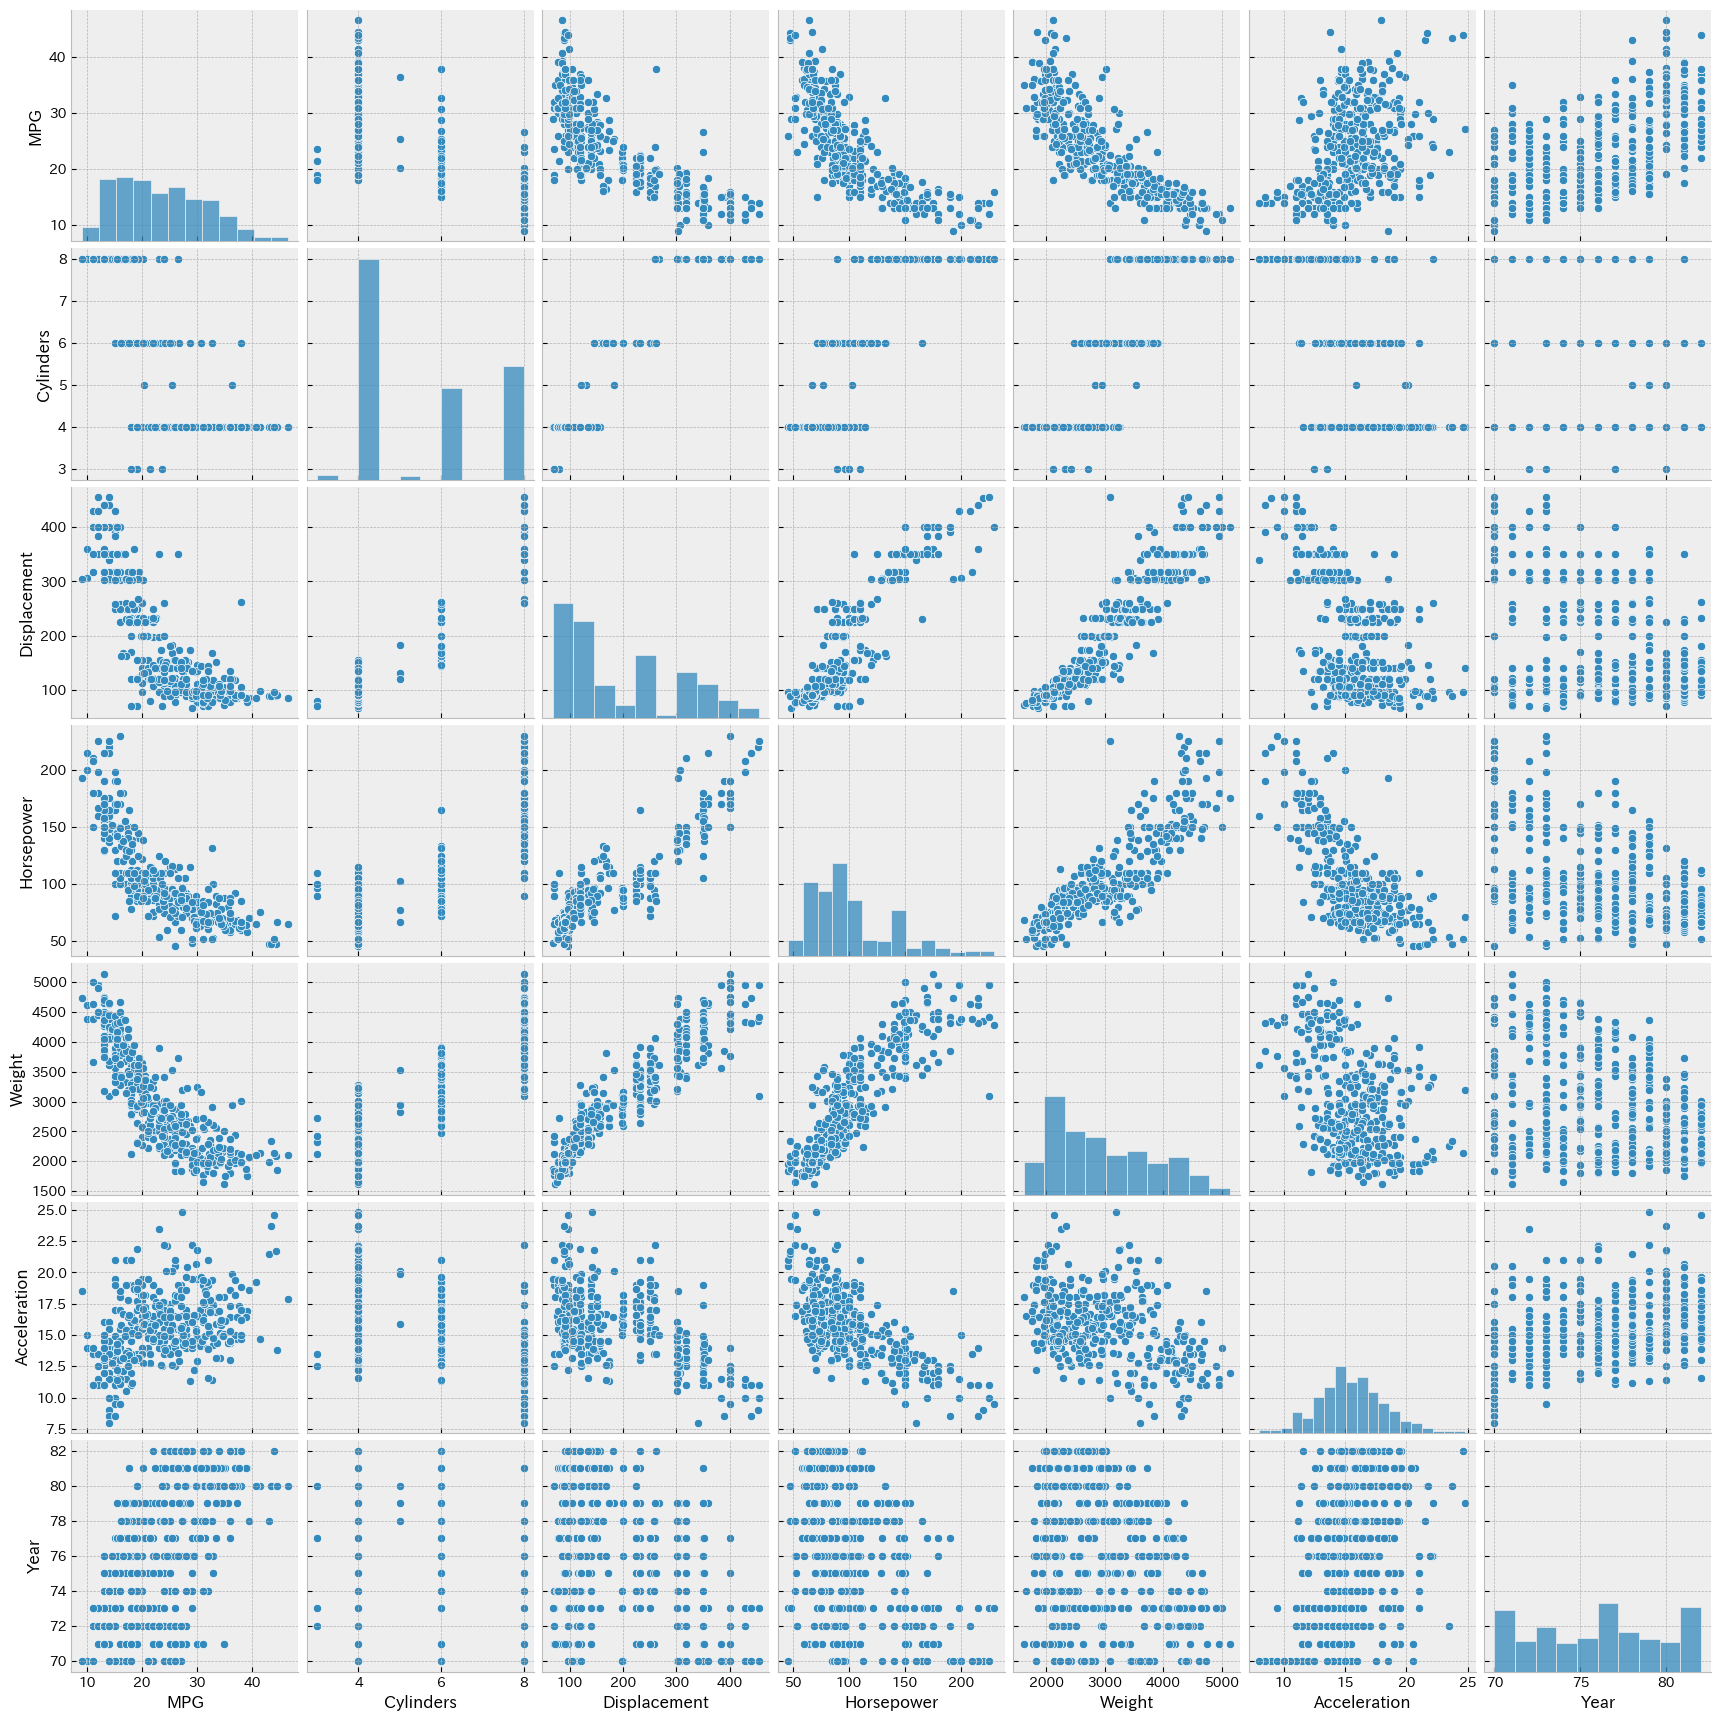

In [14]:
sns.pairplot(df);

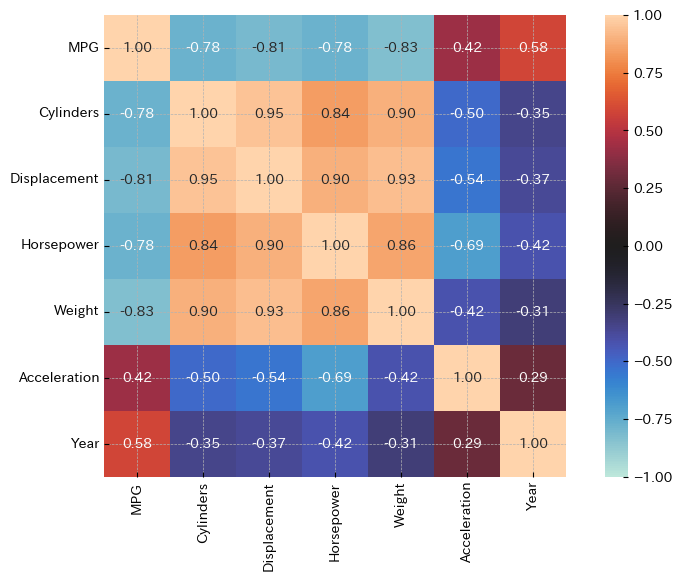

In [15]:
sns.heatmap(df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

単回帰分析

In [16]:
import statsmodels.api as sm

In [17]:
# 目的変数と説明変数
y = df['MPG']
x = df['Weight']

In [18]:
# 乱数の固定
np.random.seed(0)

In [19]:
# 切片を追加
# sm.add_constant(x)

,const,Weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0
...,...,...
387,1.0,2790.0
388,1.0,2130.0
389,1.0,2295.0
390,1.0,2625.0


In [25]:
# OLSクラス
simple_ols = sm.OLS(y, sm.add_constant(x)) # モデルのインスタンス化

In [26]:
# 分析の実行
result = simple_ols.fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          6.02e-102
Time:                        00:43:21   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
Weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared：決定係数・モデルの精度を確認。最大１。
- Adj R-squares:自由度調整済み決定係数。
- const：切片の値
- weight:回帰係数の値

In [28]:
# 決定係数
result.rsquared

0.6926304331206254

In [29]:
# 重みと切片
result.params

const     46.216525
Weight    -0.007647
dtype: float64

- P値が算出されている。
- 帰無仮説：a = 0
- 対立仮説：a != 0　何かしらの関係性がある。

In [30]:
# p値
result.pvalues

const     1.623069e-193
Weight    6.015296e-102
dtype: float64

In [32]:
# 予測
pred = result.predict()
pred[:3]

array([19.4202363 , 17.97488856, 19.9402556 ])

In [33]:
# 目標値
df['MPG'][:3]

0    18.0
1    15.0
2    18.0
Name: MPG, dtype: float64

重回帰分析

In [35]:
# 標準化　平均0、分散1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
# 説明変数
x = df.drop(['MPG', 'Origin'], axis = 1)
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70


In [38]:
# 目的変数
y = df['MPG']

In [42]:
# 標準化
x_scaled = scaler.fit_transform(x) # numpy.ndarray

In [43]:
# インスタンス化
multi_ols = sm.OLS(y, sm.add_constant(x_scaled))

In [49]:
# 分析
result = multi_ols.fit()

In [50]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):          3.79e-135
Time:                        00:59:07   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.174    135.130      0.000      23.105      23.787
x1            -0.5619      0.566     -0.993      0.321      -1.674       0.550
x2             0.8025      0.769      1.044      0.297      -0.709       2.314
x3            -0.0150      0.532     -0.028      0.977      -1.061       1.031
x4            -5.7640      0.568    -10.141      0.000      -6.882      -4.646
x5             0.2350      0.281      0.836      0.404      -0.318       0.788
x6             2.7717      0.194     14.318      0.000       2.391       3.152
==============================================================================
Omnibus:                       37.865   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.248
Skew:                           0.630   Prob(JB):                     8.26e-14
Kurtosis:                       4.449   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# 自由度調整済み決定係数
result.rsquared_adj

0.8062826441922383

In [52]:
# 偏回帰係数
result.params

const    23.445918
x1       -0.561950
x2        0.802476
x3       -0.015045
x4       -5.764000
x5        0.234957
x6        2.771664
dtype: float64

- 帰無仮説：a = 0
- 対立仮説：a != 0

In [53]:
# p値
result.pvalues

const    0.000000e+00
x1       3.212169e-01
x2       2.973318e-01
x3       9.774501e-01
x4       1.416190e-21
x5       4.038303e-01
x6       1.410428e-37
dtype: float64

In [55]:
# t値（大きいほど目的変数と関係のある説明変数である）
result.tvalues

const    135.130285
x1        -0.993240
x2         1.043586
x3        -0.028284
x4       -10.140877
x5         0.835721
x6        14.317630
dtype: float64

実践

In [56]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/データ分析/hotel_reviews.csv')
df.head()

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3
3,男性,30,個人,航空関係,3,4,3,4,5,1,4,4,5,3
4,男性,59,グループ,航空関係,4,3,3,3,4,4,3,5,4,4


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [58]:
df.describe()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39.486800,2.814000,3.104400,2.841000,2.989100,3.20040,3.438700,3.293900,3.646200,3.281900,3.201900
std,15.175528,1.248984,1.482404,1.331201,1.274654,1.32658,1.316441,1.261936,1.168829,1.310116,0.967176
min,7.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,27.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000
50%,40.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,51.000000,4.000000,4.000000,4.000000,4.000000,4.00000,5.000000,4.000000,5.000000,4.000000,4.000000
max,80.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [61]:
# 文字列変数
df.select_dtypes(include='object').columns

Index(['性別', '個人/グループ', '旅行の目的'], dtype='object')

In [62]:
# onehot-encoding
_df = pd.get_dummies(df, drop_first = True)
_df.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,2,0,1,1,0,0,0
2,22,1,1,1,4,1,5,1,3,1,3,0,0,0,0,0,0
3,30,3,4,3,4,5,1,4,4,5,3,1,1,0,0,0,1
4,59,4,3,3,3,4,4,3,5,4,4,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41,3,2,2,2,3,3,3,2,3,3,0,0,0,1,0,0
9996,60,2,4,2,1,4,4,2,1,4,3,1,1,0,1,0,0
9997,33,5,5,5,5,4,4,3,5,4,5,1,0,0,1,0,0
9998,22,5,5,5,5,5,5,1,3,5,5,0,0,0,0,1,0


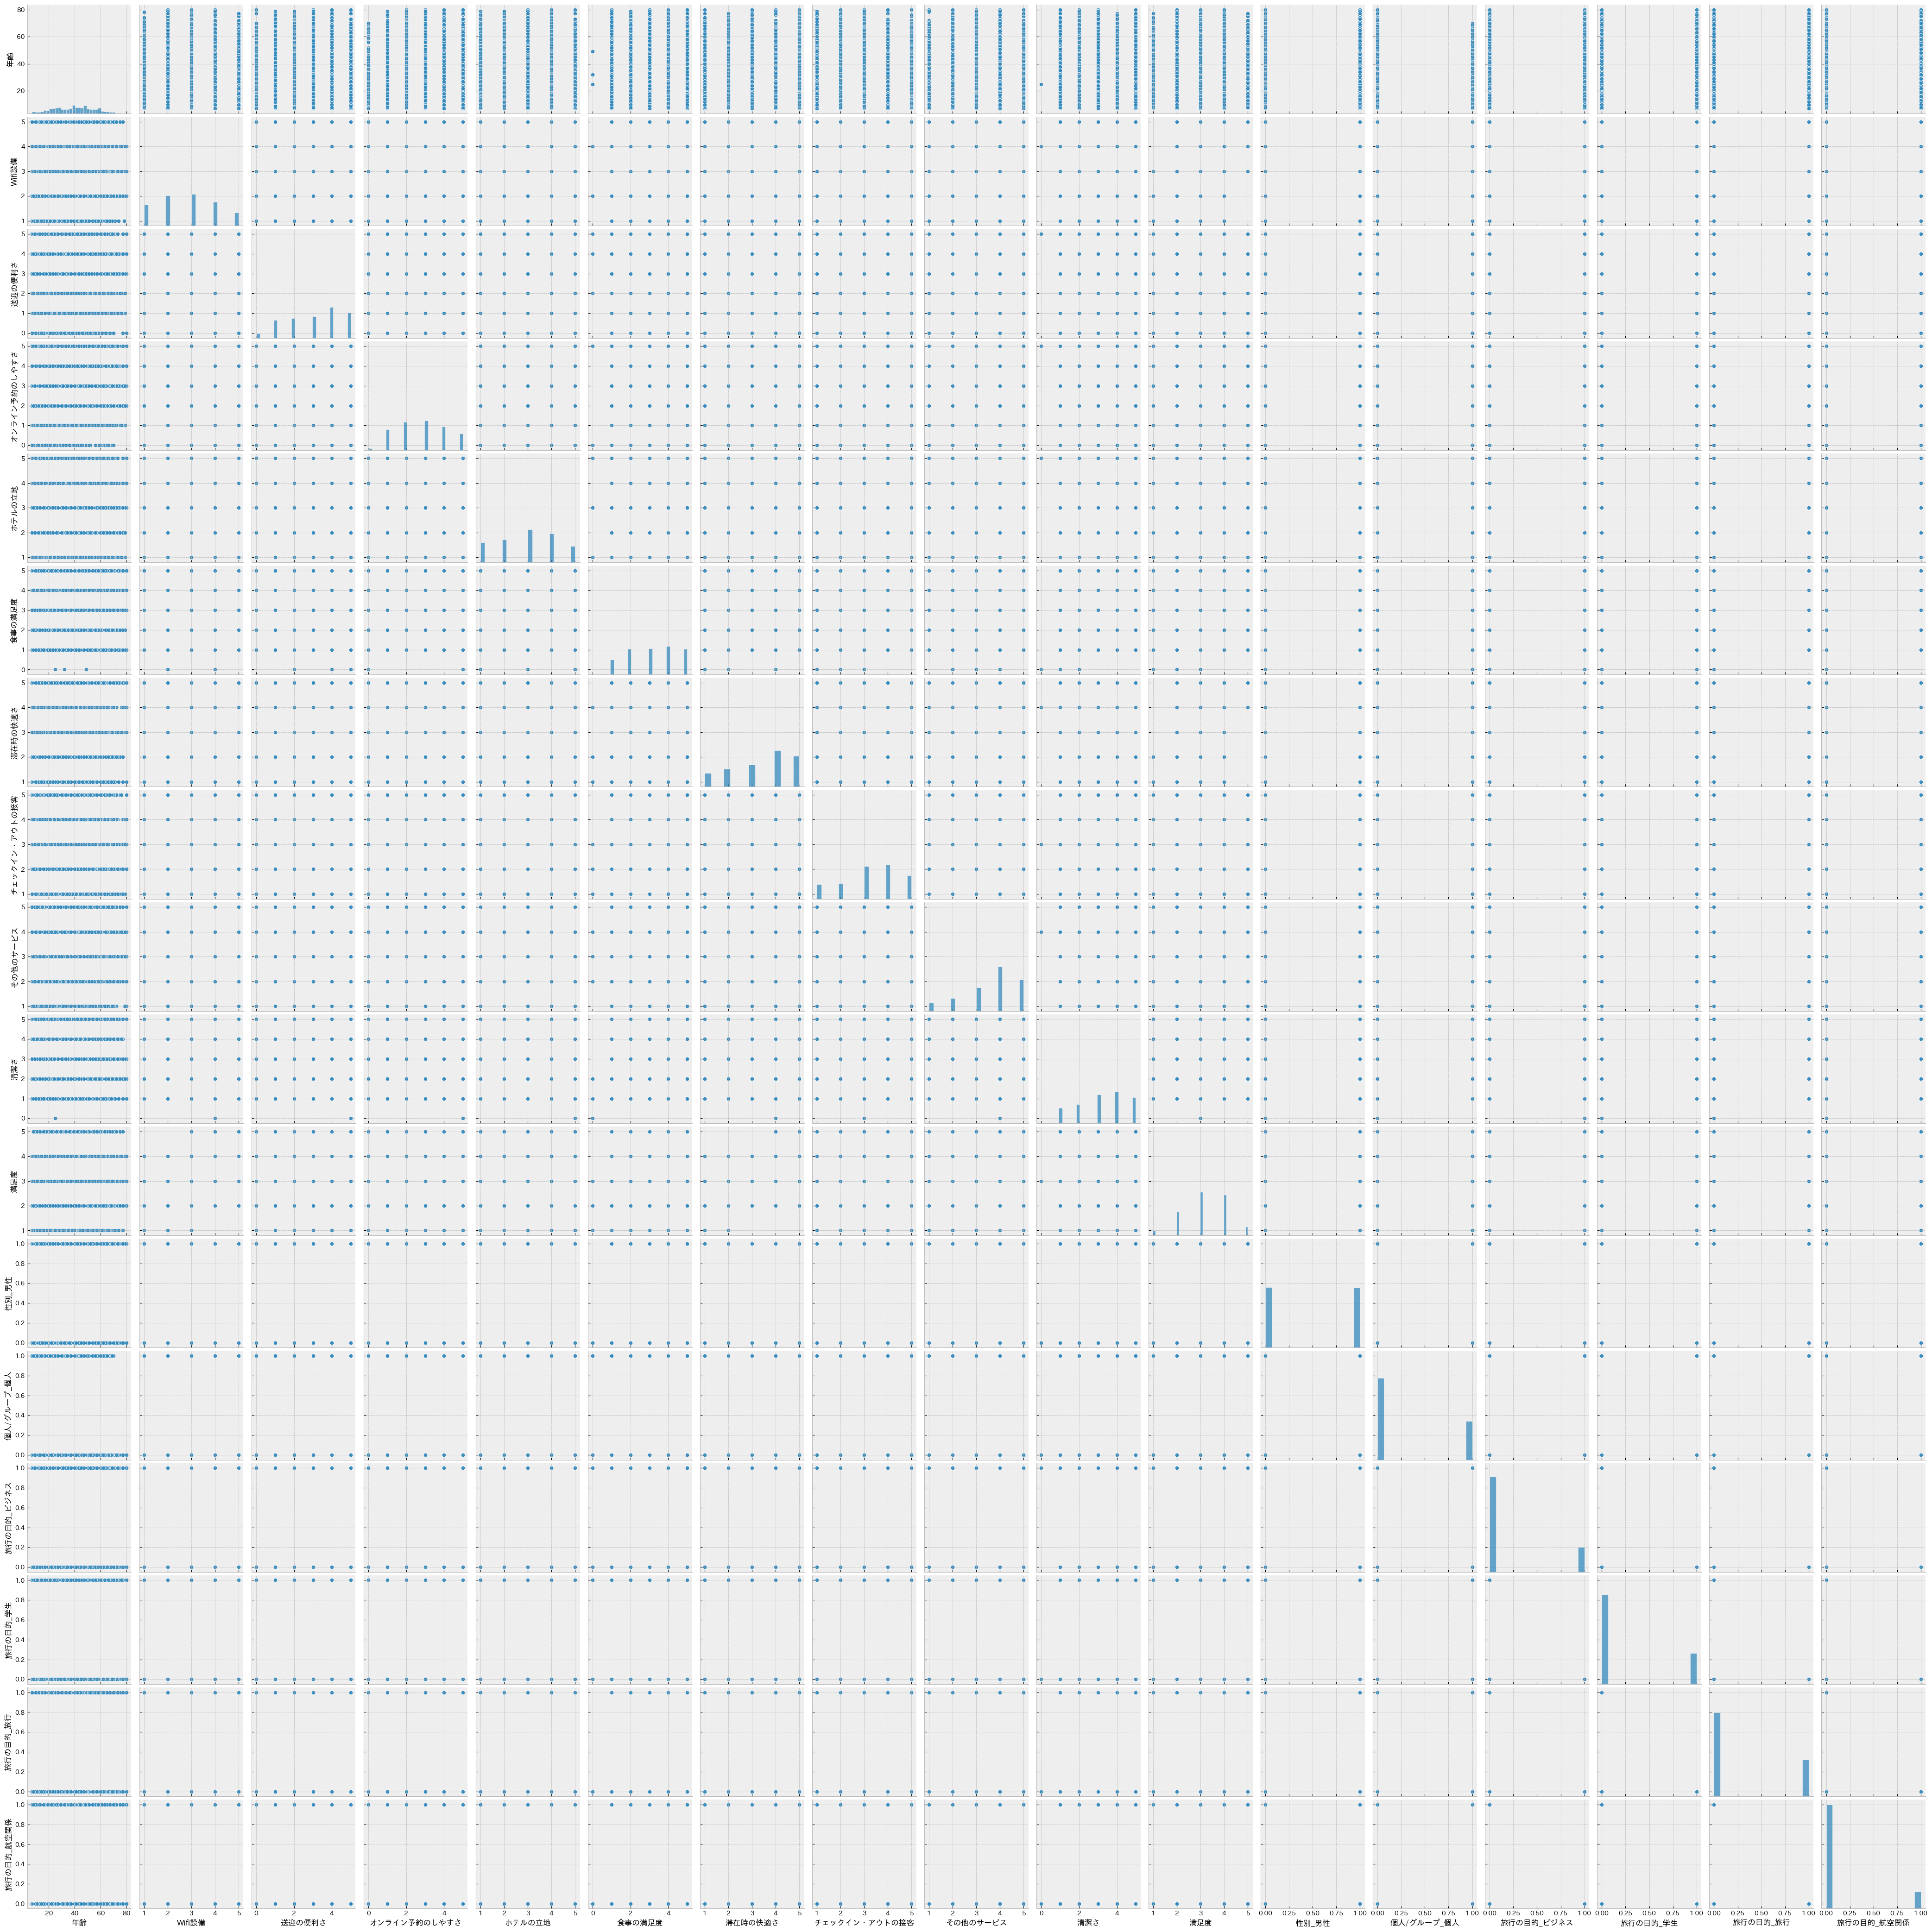

In [63]:
sns.pairplot(_df)

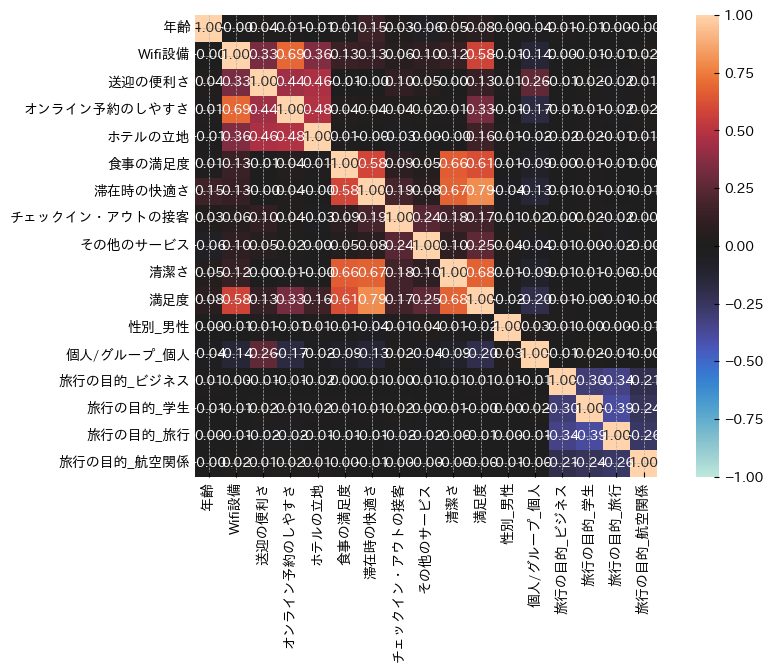

In [64]:
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
x = _df.drop('満足度', axis = 1)
y = _df['満足度']
x.head(2)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,0,1,1,0,0,0


In [67]:
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns = _df.drop('満足度', axis = 1).columns)
feature.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,0.692808,0.949620,0.604184,0.870686,0.793117,-0.151073,0.426398,0.559565,0.302711,0.548147,-0.993819,-0.686310,-0.512160,1.698974,-0.661051,-0.400788
1,-0.295675,0.949620,1.278798,0.870686,0.793117,-1.658784,-1.852588,1.352038,0.302711,-1.741841,-0.993819,1.457068,1.952516,-0.588590,-0.661051,-0.400788
2,-1.152360,-1.452454,-1.419657,-1.383031,0.793117,-1.658784,1.186060,-1.817854,-0.552888,-1.741841,-0.993819,-0.686310,-0.512160,-0.588590,-0.661051,-0.400788
3,-0.625169,0.148929,0.604184,0.119447,0.793117,1.356638,-1.852588,0.559565,0.302711,1.311476,1.006219,1.457068,-0.512160,-0.588590,-0.661051,2.495082
4,1.285898,0.949620,-0.070430,0.119447,0.008552,0.602783,0.426398,-0.232908,1.158311,0.548147,1.006219,-0.686310,-0.512160,-0.588590,-0.661051,2.495082


In [68]:
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [69]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     6930.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        01:19:06   Log-Likelihood:                -1386.0
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9983   BIC:                             2929.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1151.022      0.000       3.196       3.207
年齢               -0.0036      0.003     -1.271      0.204      -0.009       0.002
Wifi設備            0.4633      0.004    117.969      0.000       0.456       0.471
送迎の便利さ           -0.0154      0.004     -4.333      0.000      -0.022      -0.008
オンライン予約のしやすさ     -0.0345      0.004     -8.011      0.000      -0.043      -0.026
ホテルの立地            0.0117      0.003      3.464      0.001       0.005       0.018
食事の満足度            0.1147      0.004     29.853      0.000       0.107       0.122
滞在時の快適さ           0.5276      0.004    132.126      0.000       0.520       0.535
チェックイン・アウトの接客    -0.0299      0.003    -10.165      0.000      -0.036      -0.024
その他のサービス          0.1433      0.003     49.432      0.000       0.138       0.149
清潔さ               0.1590      0.004     37.565      0.000       0.151       0.167
性別_男性             0.0007      0.003      0.252      0.801      -0.005       0.006
個人/グループ_個人       -0.0247      0.003     -7.986      0.000      -0.031      -0.019
旅行の目的_ビジネス        0.0008      0.004      0.188      0.851      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.839      0.402      -0.013       0.005
旅行の目的_旅行          0.0024      0.005      0.489      0.625      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.290      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3087.589   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.976
Skew:                           0.044   Prob(JB):                    6.52e-102
Kurtosis:                       1.946   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
result.rsquared_adj

0.917274893983254

In [73]:
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]], index = ['t', 'p', 'coef']).T
res_values

,t,p,coef
年齢,-1.270955,2.037742e-01,-0.003611
Wifi設備,117.969420,0.000000e+00,0.463290
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
ホテルの立地,3.464405,5.336381e-04,0.011694
食事の満足度,29.853107,1.196351e-187,0.114661
滞在時の快適さ,132.125668,0.000000e+00,0.527593
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023


In [77]:
# t値の絶対値が2以上、p値が0.05以下を採用
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
滞在時の快適さ,132.125668,0.000000e+00,0.527593
Wifi設備,117.969420,0.000000e+00,0.463290
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023
食事の満足度,29.853107,1.196351e-187,0.114661
ホテルの立地,3.464405,5.336381e-04,0.011694
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
個人/グループ_個人,-7.985699,1.551319e-15,-0.024688
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936


In [80]:
tmp = df.corr()['満足度']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

満足度        1.000000
滞在時の快適さ    0.793672
清潔さ        0.678053
食事の満足度     0.612857
Wifi設備     0.575273
Name: 満足度, dtype: float64

In [79]:
tmp

年齢               0.077890
Wifi設備           0.575273
送迎の便利さ           0.127945
オンライン予約のしやすさ     0.325936
ホテルの立地           0.159002
食事の満足度           0.612857
滞在時の快適さ          0.793672
チェックイン・アウトの接客    0.171880
その他のサービス         0.250305
清潔さ              0.678053
満足度              1.000000
Name: 満足度, dtype: float64